In [148]:
# library packages
library(tidyverse)

In [153]:
# define the functions that are going to be used repeatedly

# import the embeddings and normailize it
embedding <- function(path){
     data <- read_csv(path) %>% select(-1)
    
    ## Readings with problems correspond to white spaces
    (norm_factor <- data %>% summarise(across(.fns=~sqrt(sum(.x^2)))))

    ## Normalize
    data <- data %>% mutate(across(.fns=~.x/sqrt(sum(.x^2))))
    return(data)
}

# import the seed word
seed <- function(path, y){
    df = read_csv(path)
    return(df)
}


# get the vector
vec <- function(df, embedding){
    index <- df$word %in% colnames(embedding)
    vector <- embedding %>% select(df$word) %>% rowMeans(na.rm = TRUE)
    return(vector)
}

# get the polarities
get_polarities <- function(pos_vec, neg_vec, embed){
    axis <- pos_vec - neg_vec
    dot_p <- t(axis %*% as.matrix(embed))
    
    new_dict <- tibble("Word"=rownames(dot_p), "Sim"=dot_p[,1]) %>% arrange(desc(Sim))
    return(new_dict)
    
}


## 1.  Pre-trained embedding

In [150]:
neg_path1 = 'wsj_negative_lag1.csv'
pos_path1 = 'wsj_positive_lag1.csv'

pre_embedding = 'pre_embedding.csv'

emb = embedding(pre_embedding) # embeddings

pos1 = seed(pos_path1)
neg1 = seed(neg_path1)

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  bankratecom = col_logical(),
  caldwell = col_logical(),
  inc = col_logical(),
  mr = col_logical(),
  ms = col_logical(),
  phillip = col_logical(),
  realtorcom = col_logical(),
  st = col_logical(),
  wouldnt = col_logical(),
  additionally = col_logical(),
  climbs = col_logical(),
  co = col_logical(),
  companys = col_logical(),
  currencys = col_logical(),
  disappoint = col_logical(),
  dont = col_logical(),
  feb = col_logical(),
  goodwin = col_logical(),
  ltd = col_logical(),
  mcdonalds = col_logical()
  # ... with 2687 more columns
)
ℹ Use `spec()` for the full column specifications.



── Column specification ────────────────────────────────────────────────────────
cols(
  word = col_character(),
  freq = col_double(),
  neg_freq = col_double(),
  total_freq = col_double(),
  pos_prob = col_doubl

### 1.1 Pretrained Embedding  (F + F)

In [151]:
pos_words1 = pos1[is.na(pos1$Comment), ] # positive seed words
pos_vec = vec(pos_words1, emb) # positive vector, filtered positive seeds

neg_words1 = neg1[is.na(neg1$Comment), ] # negative seed words
neg_vec = vec(neg_words1, emb) # negative vector

In [154]:
polar = get_polarities(pos_vec, neg_vec, emb)

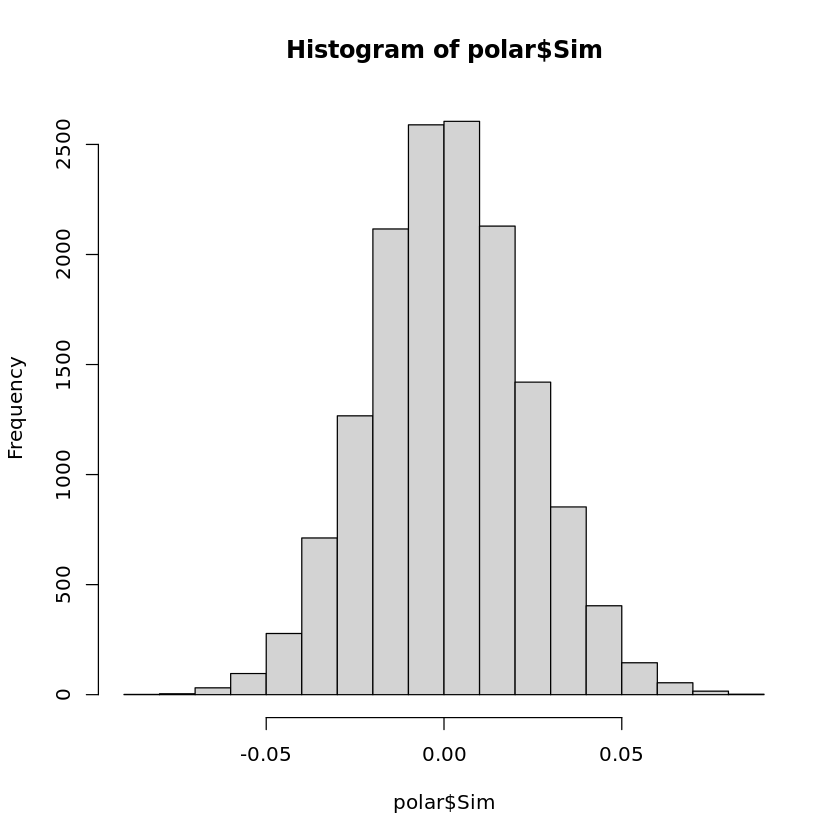

In [127]:
hist(polar$Sim)

In [128]:
write.csv(polar, 'SemAxis11.csv', row.names = FALSE)

### 1.2. Pretrained Embedding (NF + F)

In [129]:
pos_vec2 = vec(pos1, emb) # non-filtered positive vector

neg_words2 = neg1[is.na(neg1$Comment), ] # negative seed words
neg_vec2 = vec(neg_words1, emb) # negative vector

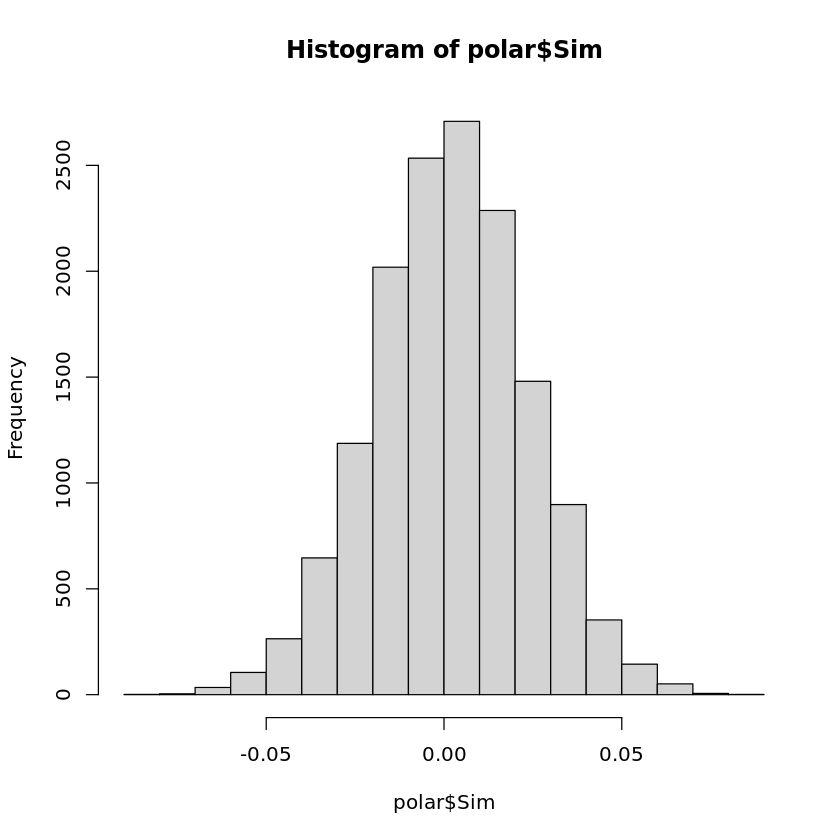

In [130]:
polar = get_polarities(pos_vec2, neg_vec2, emb) # get the polarities
hist(polar$Sim)

In [131]:
write.csv(polar, 'SemAxis12.csv', row.names = FALSE)

### 1.3. Pretrained Embedding (F + NF)

In [132]:
neg_vec3 = vec(neg1, emb) # non-filtered negative vector

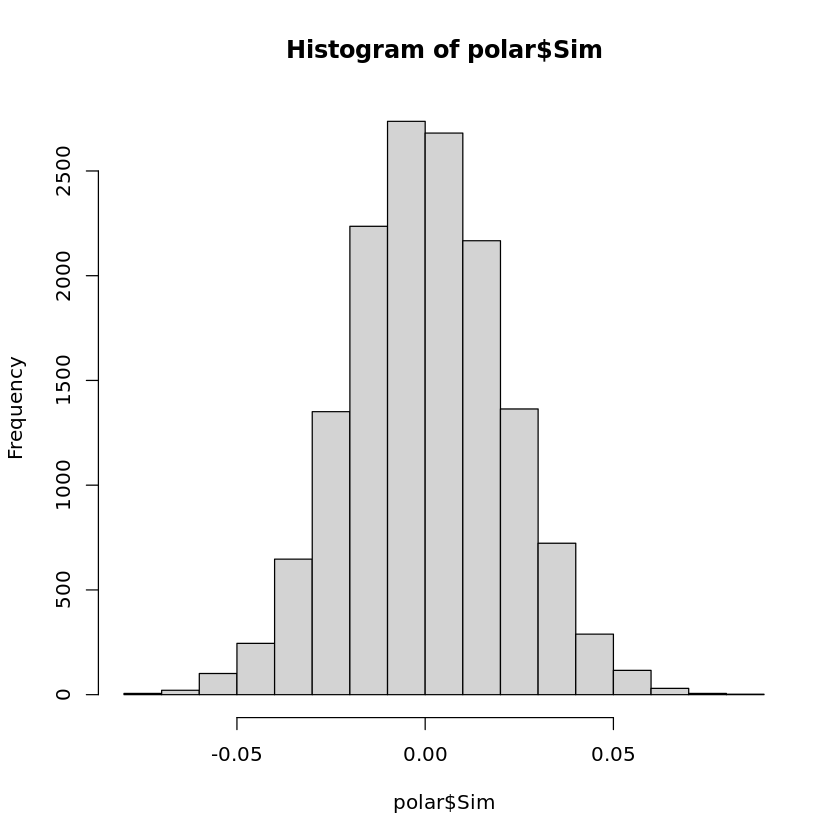

In [133]:
polar = get_polarities(pos_vec, neg_vec3, emb) # get the polarities
hist(polar$Sim)

In [134]:
write.csv(polar, 'SemAxis13.csv', row.names = FALSE)

### 1.4. Pretrained Embedding (NF + NF)

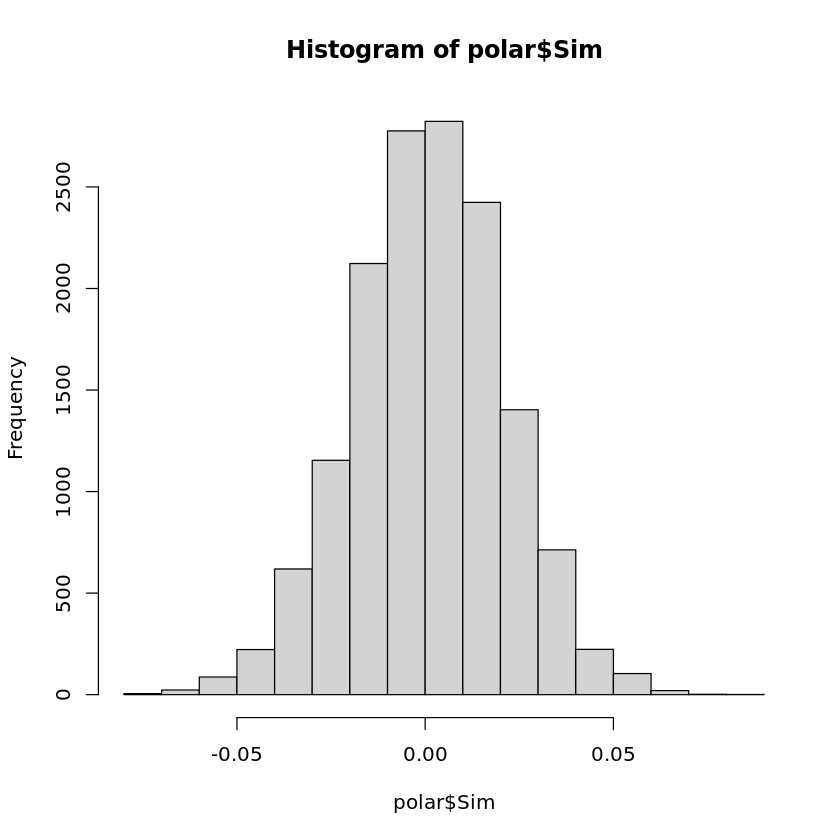

In [135]:
polar = get_polarities(pos_vec2, neg_vec3, emb) # get the polarities
hist(polar$Sim)

In [136]:
write.csv(polar, 'SemAxis14.csv', row.names = FALSE)

## 2.  Self-trained embedding

In [137]:
self_embedding = 'self_embedding.csv'
emb_s = embedding(self_embedding) # embeddings

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  bankratecom = col_logical(),
  caldwell = col_logical(),
  inc = col_logical(),
  mr = col_logical(),
  ms = col_logical(),
  phillip = col_logical(),
  realtorcom = col_logical(),
  st = col_logical(),
  wouldnt = col_logical(),
  additionally = col_logical(),
  climbs = col_logical(),
  co = col_logical(),
  companys = col_logical(),
  currencys = col_logical(),
  disappoint = col_logical(),
  dont = col_logical(),
  feb = col_logical(),
  goodwin = col_logical(),
  ltd = col_logical(),
  mcdonalds = col_logical()
  # ... with 2687 more columns
)
ℹ Use `spec()` for the full column specifications.




### 2.1 Self-trained Embedding  (F + F)

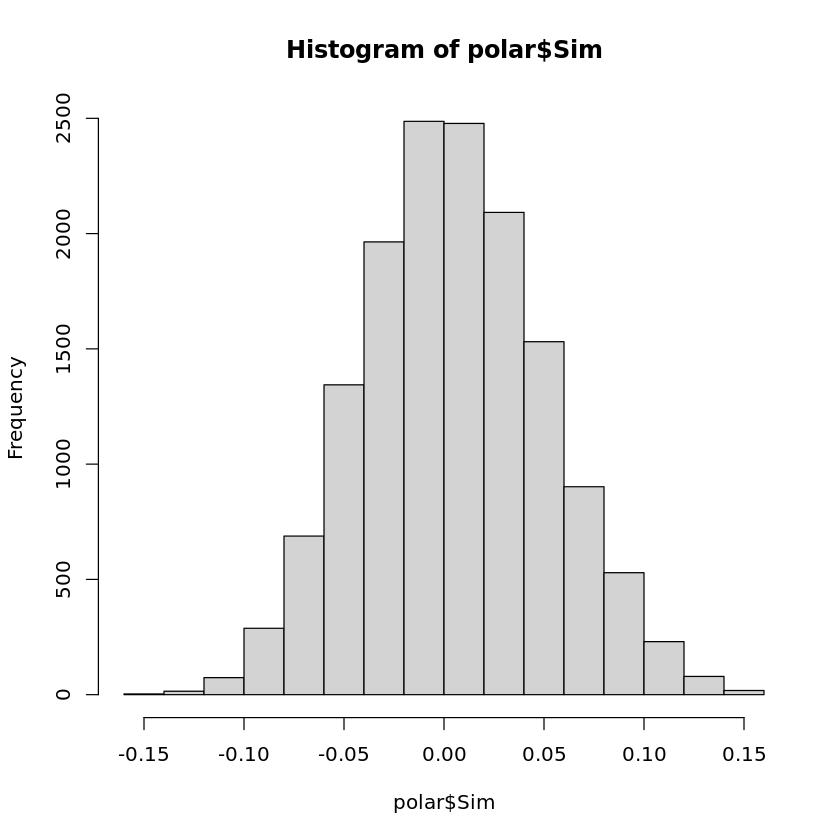

In [139]:
pos_words1 = pos1[is.na(pos1$Comment), ] # positive seed words
pos_vec = vec(pos_words1, emb_s) # positive vector, filtered positive seeds

neg_words1 = neg1[is.na(neg1$Comment), ] # negative seed words
neg_vec = vec(neg_words1, emb_s) # negative vector

polar = get_polarities(pos_vec, neg_vec, emb_s)
hist(polar$Sim)

In [140]:
write.csv(polar, 'SemAxis21.csv', row.names = FALSE)

### 2.2 Self-trained Embedding  (NF + F)

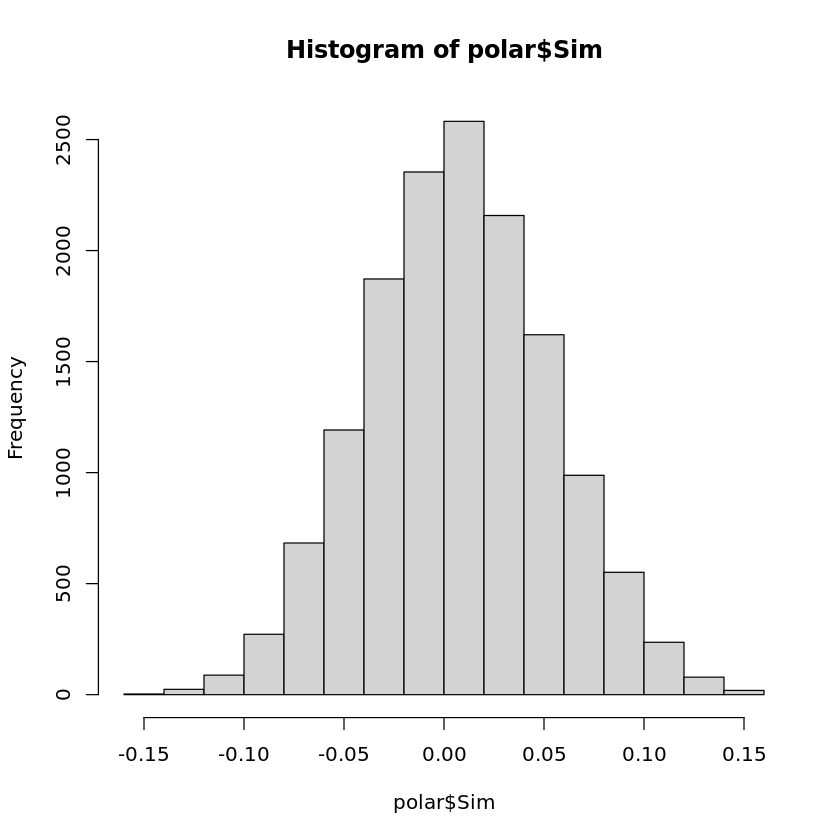

In [141]:
pos_vec22 = vec(pos1, emb_s) # positive vector

polar = get_polarities(pos_vec22, neg_vec, emb_s)
hist(polar$Sim)

In [142]:
write.csv(polar, 'SemAxis22.csv', row.names = FALSE)

### 2.3 Self-trained Embedding  (F + NF)

In [143]:
neg_vec23 = vec(neg1, emb_s) # positive vector

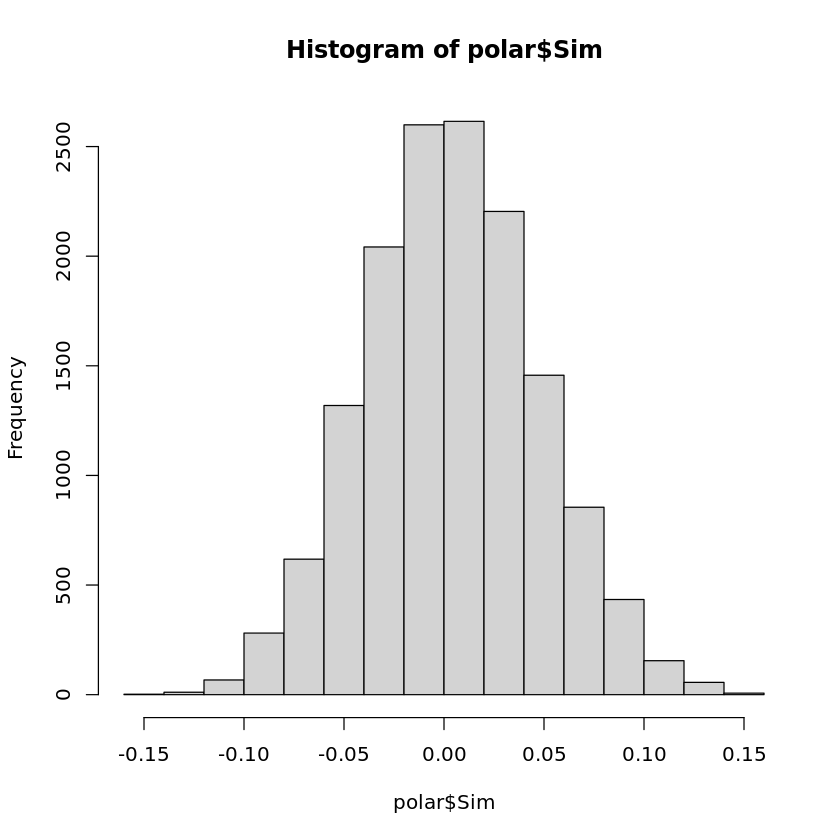

In [144]:
polar = get_polarities(pos_vec, neg_vec23, emb_s)
hist(polar$Sim)

In [145]:
write.csv(polar, 'SemAxis23.csv', row.names = FALSE)

### 2.4 Self-trained Embedding  (NF + NF)

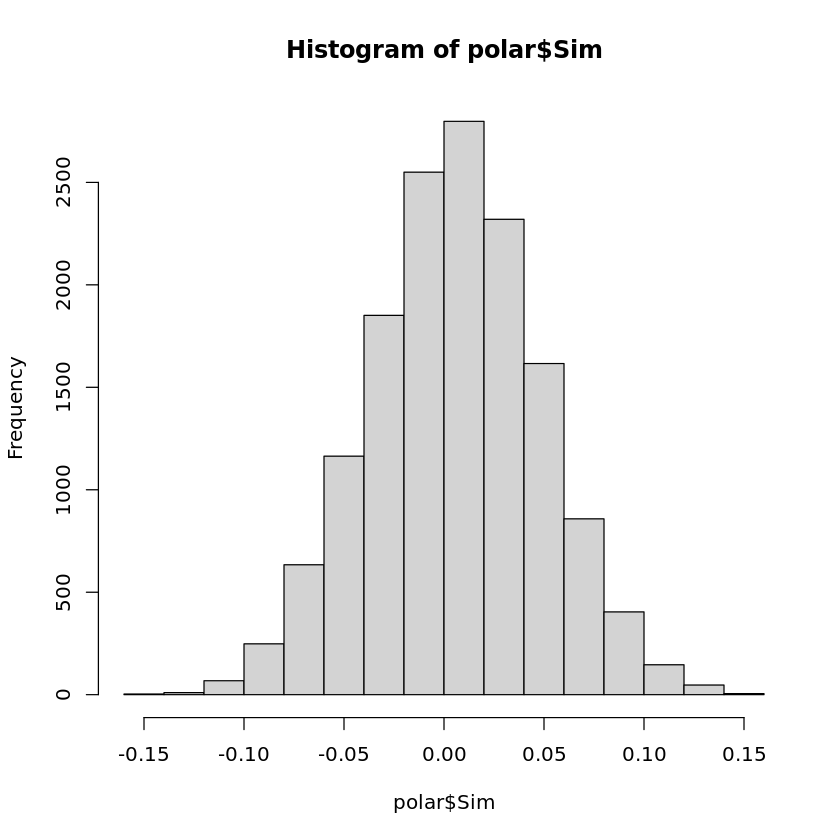

In [146]:
polar = get_polarities(pos_vec22, neg_vec23, emb_s)
hist(polar$Sim)

In [147]:
write.csv(polar, 'SemAxis24.csv', row.names = FALSE)